In [1]:
import os
os.environ["CEA_USE_SITE_PACKAGES"] = '1'
from CEA_Wrap import Fuel, Oxidizer, RocketProblem

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import bar_to_psi

In [2]:
ethanol = Fuel("C2H5OH(L)", temp=298)
n2o = Oxidizer("N2O", temp=298)


In [3]:
results = []
for _phi in np.arange(0.1, 2, 0.1):
    problem = RocketProblem(
        pressure=bar_to_psi(20),
        materials=[ethanol, n2o],
        phi=_phi,
        sub=5,
    )
    results.append(problem.run())

In [4]:
df = pd.DataFrame([vars(r) for r in results])

<Axes: title={'center': 'Specific Impulse vs Mixture Ratio'}, xlabel='Mixture Ratio (phi)', ylabel='Specific Impulse (s)'>

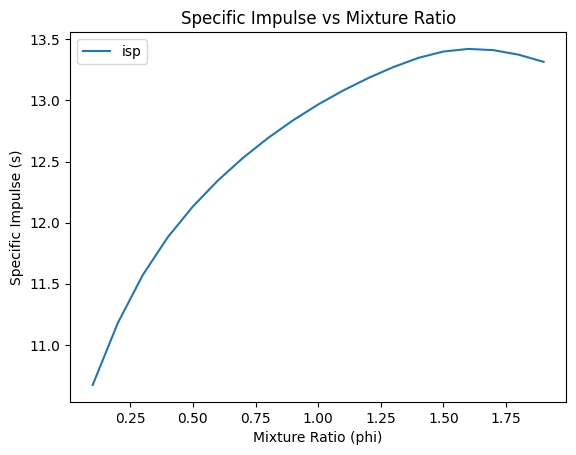

In [5]:
df.plot(x='phi', y='isp', title='Specific Impulse vs Mixture Ratio', xlabel='Mixture Ratio (phi)', ylabel='Specific Impulse (s)')

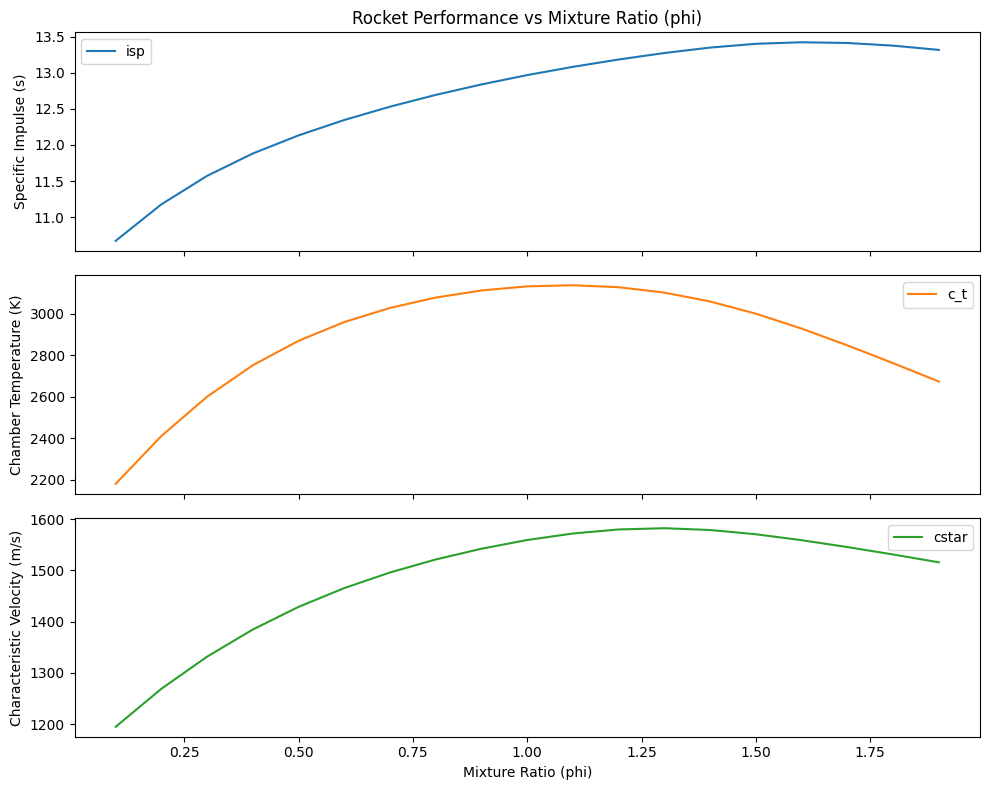

In [6]:
axes = df[["phi", "isp", "c_t", "cstar"]].plot(subplots=True, figsize=(10, 8), sharex=True, x="phi")

axes[0].set_ylabel("Specific Impulse (s)")
axes[1].set_ylabel("Chamber Temperature (K)")
axes[2].set_ylabel("Characteristic Velocity (m/s)")

axes[-1].set_xlabel("Mixture Ratio (phi)")

axes[0].set_title("Rocket Performance vs Mixture Ratio (phi)")
plt.tight_layout()
plt.show()

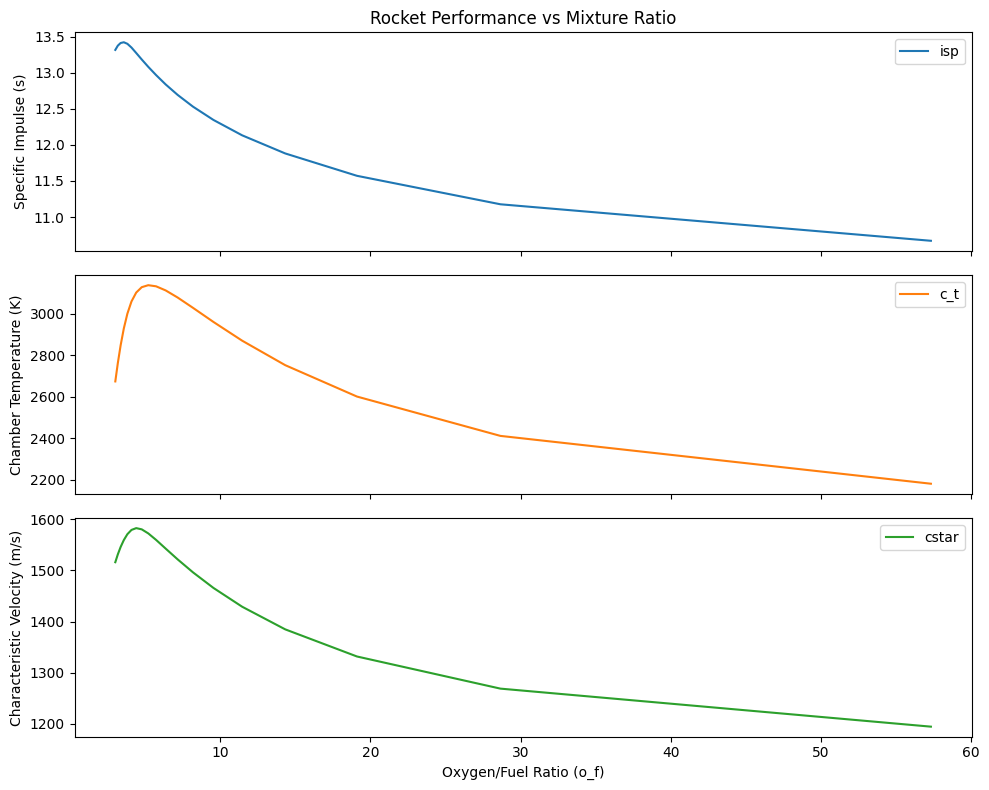

In [7]:
axes = df[["o_f", "isp", "c_t", "cstar"]].plot(subplots=True, figsize=(10, 8), sharex=True, x="o_f")

axes[0].set_ylabel("Specific Impulse (s)")
axes[1].set_ylabel("Chamber Temperature (K)")
axes[2].set_ylabel("Characteristic Velocity (m/s)")

axes[-1].set_xlabel("Oxygen/Fuel Ratio (o_f)")

axes[0].set_title("Rocket Performance vs Mixture Ratio")
plt.tight_layout()
plt.show()